In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing The Dependecies

In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# display gifs 
import IPython.display
from IPython.display import HTML
from IPython.display import Image
import base64
import gensim


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans  



# for nlp 
import nltk

from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag.util import untag
from nltk import pos_tag


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


stop_words = set(stopwords.words("english"))

from bs4 import BeautifulSoup


# import pycontractions # Alternative better package for removing contractions
#from autocorrect import Speller

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [57]:
PATH = "/kaggle/input/nft-art-dataset/dataset/"

# Loading Data


In [79]:
data = pd.read_csv(PATH+"dataset.csv")

# Basic Analysis

In [59]:
data['title'].unique

<bound method Series.unique of 0                                       30 min Drawings
1                                    Experimental Video
2                                              Sexy Art
3                                           Dream World
4                                           Dream World
                             ...                       
4184                                   Abstract Erotica
4185                                            GIF art
4186                                                Eye
4187                                           HIVE ART
4188    fine arts -  high resolution printable artworks
Name: title, Length: 4189, dtype: object>

In [60]:
data.head()

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,SWAP.HIVE,VIDEO,0,False,1,2020,1,0,QmeN4KuTQwHPWvGDhiopNJziqmf1feGeabDD4Gk7z9DgUL,./dataset/video/QmeN4KuTQwHPWvGDhiopNJziqmf1fe...
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,SWAP.HIVE,GIF,0,False,2,2020,1,0,Qmb8WbXXdorG52sgY4mSyYUjevE65SGa2vhSxdXstfinz1,./dataset/gif/Qmb8WbXXdorG52sgY4mSyYUjevE65SGa...


In [61]:
data.columns

Index(['title', 'name', 'creator', 'art_series', 'price', 'symbol', 'type',
       'likes', 'nsfw', 'tokens', 'year', 'rights', 'royalty', 'cid', 'path'],
      dtype='object')

In [62]:
data.describe()

,price,likes,tokens,year,rights,royalty
count,4.189000e+03,4189.000000,4189.000000,4189.000000,4189.000000,4189.0
mean,2.006903e+03,0.480783,4.162091,2018.009071,1.610169,0.0
std,5.898135e+04,0.935313,9.319016,60.146922,0.920997,0.0
min,2.500000e+00,0.000000,1.000000,1.000000,1.000000,0.0
25%,3.000000e+01,0.000000,1.000000,2020.000000,1.000000,0.0
50%,6.000000e+01,0.000000,3.000000,2020.000000,1.000000,0.0
75%,1.500000e+02,1.000000,5.000000,2021.000000,3.000000,0.0
max,2.744850e+06,10.000000,500.000000,2578.000000,3.000000,0.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       4189 non-null   object 
 1   name        4189 non-null   object 
 2   creator     4189 non-null   object 
 3   art_series  4189 non-null   object 
 4   price       4189 non-null   float64
 5   symbol      4189 non-null   object 
 6   type        4189 non-null   object 
 7   likes       4189 non-null   int64  
 8   nsfw        4189 non-null   bool   
 9   tokens      4189 non-null   int64  
 10  year        4189 non-null   int64  
 11  rights      4189 non-null   int64  
 12  royalty     4189 non-null   int64  
 13  cid         4189 non-null   object 
 14  path        4189 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 462.4+ KB


# Data Preprocessing and Cleaning


In [64]:
import re
def RegEx_clean(text, for_embedding):
    
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace

    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE) #match one or more white sepace
    RE_TAGS = re.compile(r"<.*?>") #match <any num of words>
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž0-9]+", re.IGNORECASE) #match any English word
    RE_SINGLECHAR = re.compile(r"\b^[^A-Za-zÀ-ž0-9]+\b", re.IGNORECASE) #match any word with word boundary.
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE) #match any English word and any punctuation
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE) #match any word and any punctuation with word boundary.

    text = re.sub(RE_TAGS, " ", text) #remove one or more white sepace
    text = re.sub(RE_ASCII, " ", text) #remove <any num of words>
    text = re.sub(RE_SINGLECHAR, " ", text) #remove any English word
    text = re.sub(RE_WSPACE, " ", text) #remove any word with word boundary.
    word_tokens = word_tokenize(text)
    
    return word_tokens

In [65]:
data['tokens'].unique()

array([ 30,   1,   2,   6,   3,   5,  10,  18,   4,   7,  20,  11,  40,
        14,  15,  53,  41,   8,  13,   9,  50,  35,  60,  21,  25,  23,
        12, 100,  17,  42, 500,  32,  22,  33,  44])

In [68]:
# most liked creators
df2 = data.groupby('likes').sum()
df2

,price,nsfw,tokens,year,rights,royalty
likes,,,,,,
0,1.985196e+06,93,12375,5950080,4766,0
1,3.505864e+06,23,3150,1578113,1227,0
2,2.706988e+06,14,1074,545480,446,0
3,1.349598e+05,8,438,220193,187,0
4,3.080530e+04,1,234,98978,77,0
5,6.671000e+03,1,125,38386,25,0
6,2.928400e+04,0,23,14130,11,0
7,1.650000e+03,0,11,4039,4,0
9,4.990000e+02,0,4,2021,1,0


In [69]:
max_likes_art_path = (data[data['likes'] == max(data['likes'].unique())]['path']).iloc[0].replace('./dataset/','')
max_likes_art_path
# so it is a video so we call play method

#play(PATH+max_likes_art_path)

'video/QmdM9pzTsoaWna1imLGkpbSaWm4o5nW6JqasZnaVewrLNw.mp4'

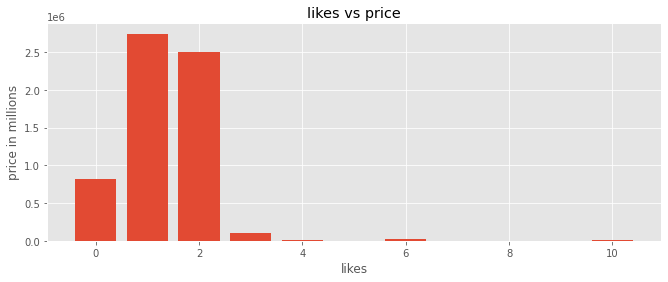

In [70]:
# PRICE AS COMPARED TO EACH LIKES
likes = data['likes']
price = data['price']
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(likes,price)
plt.title('likes vs price')
plt.xlabel('likes')
plt.ylabel('price in millions')
plt.show()

In [71]:

likes_creators = data.groupby(['creator']).count()['likes']
len(likes_creators.values)

515

In [51]:
#!pip install chart_Studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 749.1 kB/s eta 0:00:00a 0:00:01


In [83]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px


likes_creators = data.groupby(['creator']).count()['likes']
labels = likes_creators.index.tolist()

'''
data = [go.Bar(x=likes_creators,
            y=labels)]

py.iplot(data, filename='jupyter-basic_bar')
'''

fig = px.bar(data, x=labels, y=likes_creators.values)
fig.show()
'''
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(labels,likes_creators.values)
plt.title('likes vs creator')
plt.xlabel('creator')
plt.ylabel('likes')
plt.show()

likes_creators
'''

"\nplt.style.use('ggplot')\nplt.figure(figsize=(11,4))\nplt.bar(labels,likes_creators.values)\nplt.title('likes vs creator')\nplt.xlabel('creator')\nplt.ylabel('likes')\nplt.show()\n\nlikes_creators\n"

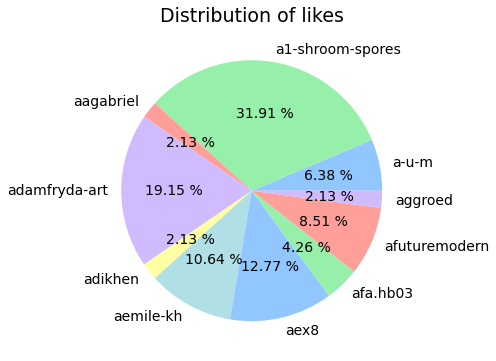

In [29]:
likes_creators = data.groupby(['creator']).count()['likes']
labels = likes_creators.index.tolist()[0:10]

plt.style.use('seaborn-pastel')

plt.figure(figsize=(6,6))

plt.pie(likes_creators.values[0:10],labels=labels,autopct='%.2f %%',textprops={'fontsize': 14})

plt.title("Distribution of likes",fontdict={'fontsize': 19})

#plt.legend(fontsize=10)
plt.show()

In [30]:
likes_creators.values.tolist().index(max(likes_creators.values.tolist()))

151

In [31]:
likes_creators.index.tolist()[151]

'elenasteem'

# So we see that `elenasteem` is the max liked creator

In [32]:
data['symbol'].unique()

array(['SWAP.HIVE'], dtype=object)

In [33]:

'''for 
RegEx_clean(data['name'].str, False)
'''

"for \nRegEx_clean(data['name'].str, False)\n"

# **WORKING ON IMAGES** 

## NLP on title feature

In [34]:
data2 = data.copy()

In [35]:
def RegEx_clean(text, for_embedding):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace

    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE) #match one or more white sepace
    RE_TAGS = re.compile(r"<.*?>") #match <any num of words>
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž0-9]+", re.IGNORECASE) #match any English word
    RE_SINGLECHAR = re.compile(r"\b^[^A-Za-zÀ-ž0-9]+\b", re.IGNORECASE) #match any word with word boundary.
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE) #match any English word and any punctuation
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE) #match any word and any punctuation with word boundary.

    text = re.sub(RE_TAGS, " ", text) #remove one or more white sepace
    text = re.sub(RE_ASCII, " ", text) #remove <any num of words>
    text = re.sub(RE_SINGLECHAR, " ", text) #remove any English word
    text = re.sub(RE_WSPACE, " ", text) #remove any word with word boundary.
    word_tokens = word_tokenize(text)
    
    return word_tokens

def lemmatize_clean_text(text ,for_embedding=False):

    """ steps:
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and lemmatize
    """

    lemmatizer = WordNetLemmatizer()


    word_tokens = RegEx_clean(text, for_embedding)
    
    

    if for_embedding:
        # no stemming or lemmatization, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_tokens_lower = [word.lower() for word in word_tokens]
        words_filtered = [lemmatizer.lemmatize(word) for word in words_tokens_lower if word not in stop_words]

    clean_text = " ".join(words_filtered)
    return clean_text


def preprocess_text(text: str, remove_stopwords: bool):
    lem_text = lemmatize_clean_text(text)
  
    #stem_text = stemming_clean_text(lem_text)

    clean_text = lem_text.lower().strip()
    
    return clean_text



In [36]:

data2['classes'] = data2['title'].str.split(" ")


for i in range(len(data2['classes'].values)):
    data2['classes'].values[i] = preprocess_text(str(data2['classes'].values[i]), True)

#for i in range(len(data2['classes'].values)):
#    print(str(data2['classes'].values[i]))
    
#data2['classes'].values.tolist()[1] .split(' ')




#RegEx_clean(str(data2['classes'].values),False)

In [37]:
data2.nsfw

0       False
1       False
2        True
3       False
4       False
        ...  
4184    False
4185    False
4186    False
4187    False
4188    False
Name: nsfw, Length: 4189, dtype: bool

In [38]:
for i in range(len(data2['classes'].values)):
    print(str(data2['classes'].values[i]))
    

30 min drawing
experimental video
sexy art
dream world
dream world
dream world
dream world
nothing real real
trippy emmeline
experimental
tentacle monster
crypto stamp
digit
suppose
digit
suppose
psychedelic art
digital drawing
glitch perfect
glitch perfect
reborn
rafael michelena nftbox
rafael michelena nftbox
rafael michelena nftbox
rafael michelena nftbox
avarice
woman
corner mind
cryptoarts
cryptoarts
mística
cryptoarts
drawing
static art
simplicity
cryptoarts
heraklion
white owl
experiment
experiment
cryptoarts
cryptoarts
cryptoarts
toxic mask virginity
animation
deepdream
ancient vaporwave
experiment
glitch perfect
ancient vaporwave
ancient vaporwave
logo design
art jrej
shade men
art jrej
art jrej
art jrej
mobile phone nfts
psychedelic art
midnight moment
photographic art
digital drawing
psychedelic art
first light
glitch
interdisciplinary hypertraining special
star war
woman
italian digital art
woman
crypto
strange fauna
woman
animal
animal
woman
digital paint
digital paint
dig

In [39]:
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) ## Corpus is in English
X = vectorizer.fit_transform(data2.classes)
X.shape

(4189, 866)

In [40]:
X.shape

(4189, 866)

In [41]:
def model_quality(labels , km):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
        % metrics.adjusted_rand_score(labels, km.labels_))
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, km.labels_, sample_size=1000))  


In [42]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    model_quality(data2.classes,kmeans)
    print("----------------------")

Homogeneity: 0.046
Completeness: 1.000
V-measure: 0.087
Adjusted Rand-Index: 0.001
Silhouette Coefficient: 0.038
----------------------
Homogeneity: 0.042
Completeness: 1.000
V-measure: 0.080
Adjusted Rand-Index: 0.001
Silhouette Coefficient: 0.052
----------------------
Homogeneity: 0.062
Completeness: 1.000
V-measure: 0.117
Adjusted Rand-Index: 0.001
Silhouette Coefficient: 0.068
----------------------
Homogeneity: 0.087
Completeness: 1.000
V-measure: 0.161
Adjusted Rand-Index: 0.002
Silhouette Coefficient: 0.065
----------------------
Homogeneity: 0.122
Completeness: 1.000
V-measure: 0.217
Adjusted Rand-Index: 0.003
Silhouette Coefficient: 0.076
----------------------
Homogeneity: 0.120
Completeness: 1.000
V-measure: 0.214
Adjusted Rand-Index: 0.002
Silhouette Coefficient: 0.086
----------------------
Homogeneity: 0.113
Completeness: 1.000
V-measure: 0.203
Adjusted Rand-Index: 0.002
Silhouette Coefficient: 0.083
----------------------
Homogeneity: 0.107
Completeness: 1.000
V-measure

Text(0.5, 1.0, 'Elbow curve')

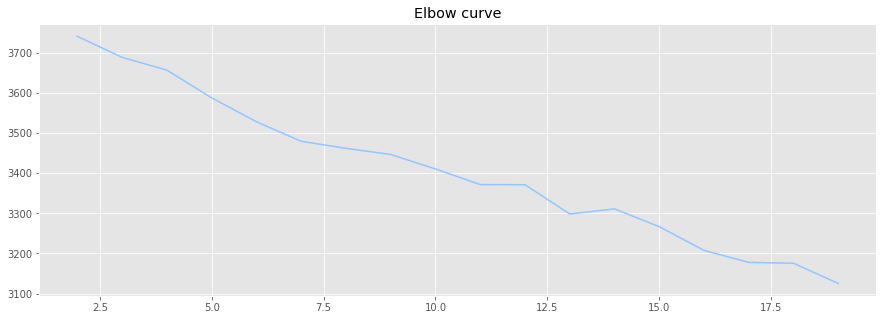

In [43]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

so we choose K = 16

In [44]:
true_k = 16

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=true_k,  init='random')
kmeans.fit(X)
distorsions.append(kmeans.inertia_)

model_quality(data2.classes,kmeans)
print("----------------------")

Homogeneity: 0.112
Completeness: 1.000
V-measure: 0.201
Adjusted Rand-Index: 0.002
Silhouette Coefficient: 0.098
----------------------


In [46]:
# Identify the 10 most relevant terms in each cluster¶
centroids = kmeans.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: min 30 drawing flower freemix fragment fractalartium fractal fox forgotten
Cluster 1: art crypto doze psychedelic rekt light face hive nft dark
Cluster 2: tip manatee hugh life flower fragment fractalartium fractal fox forgotten
Cluster 3: forest road pegasus puppet red spirit starry night sky light
Cluster 4: animation talisman painting surreal digital original feeling heart 3d force


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = kmeans.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [48]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

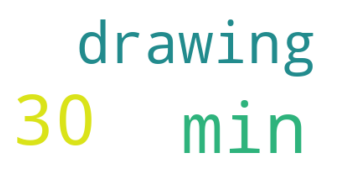

##################################


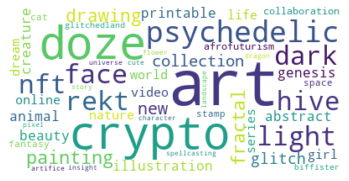

##################################


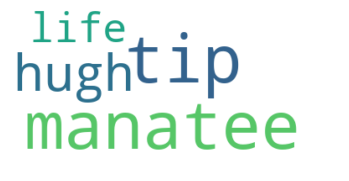

##################################


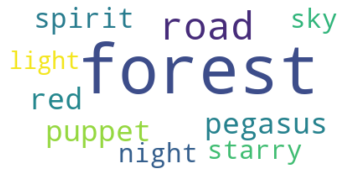

##################################


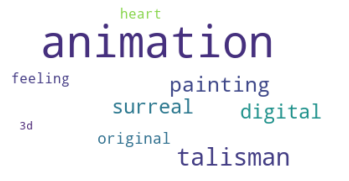

##################################


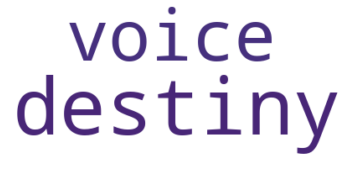

##################################


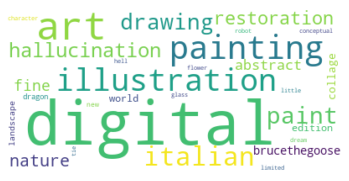

##################################


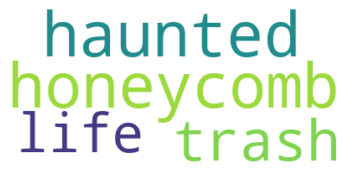

##################################


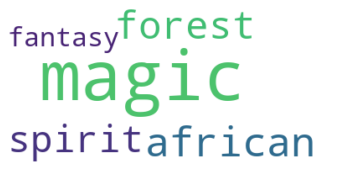

##################################


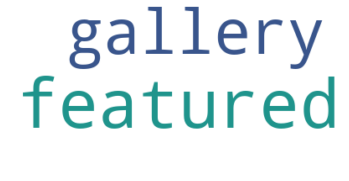

##################################


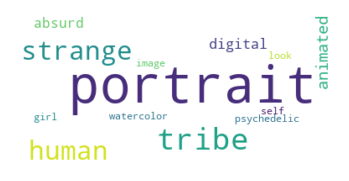

##################################


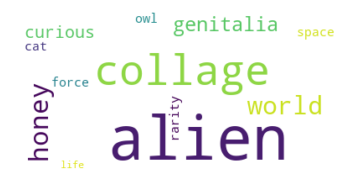

##################################


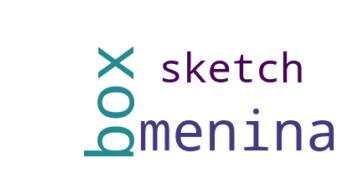

##################################


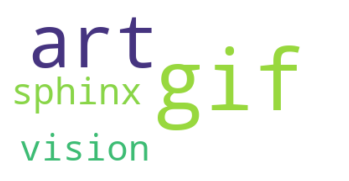

##################################


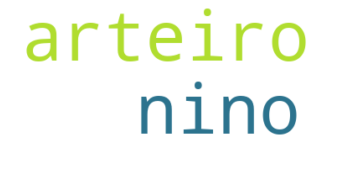

##################################


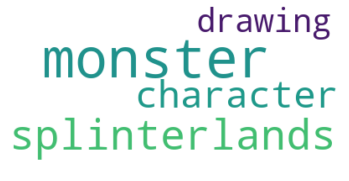

##################################


In [49]:
import warnings
warnings.filterwarnings('ignore')

for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print("##################################")
    